<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-archival_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
import matplotlib.pyplot as pl
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

In [3]:
import chronos as cr

#high proper motion star
s = cr.Star(epicid=211817229, search_radius=10)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Target: EPIC 211817229
Searching Vizier: (126.973 17.5599) with radius=3.0 arcsec


Querying Gaia DR2 catalog for ra,dec=(126.973 17.5599) within 10.0 arcsec.
astrometric_excess_noise_sig>31.01 (>5 hints binarity).

astrometric_gof_al>20.31 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf

High proper-motion star:
(pmra,pmdec)=(-10.77,-376.32) mas/yr


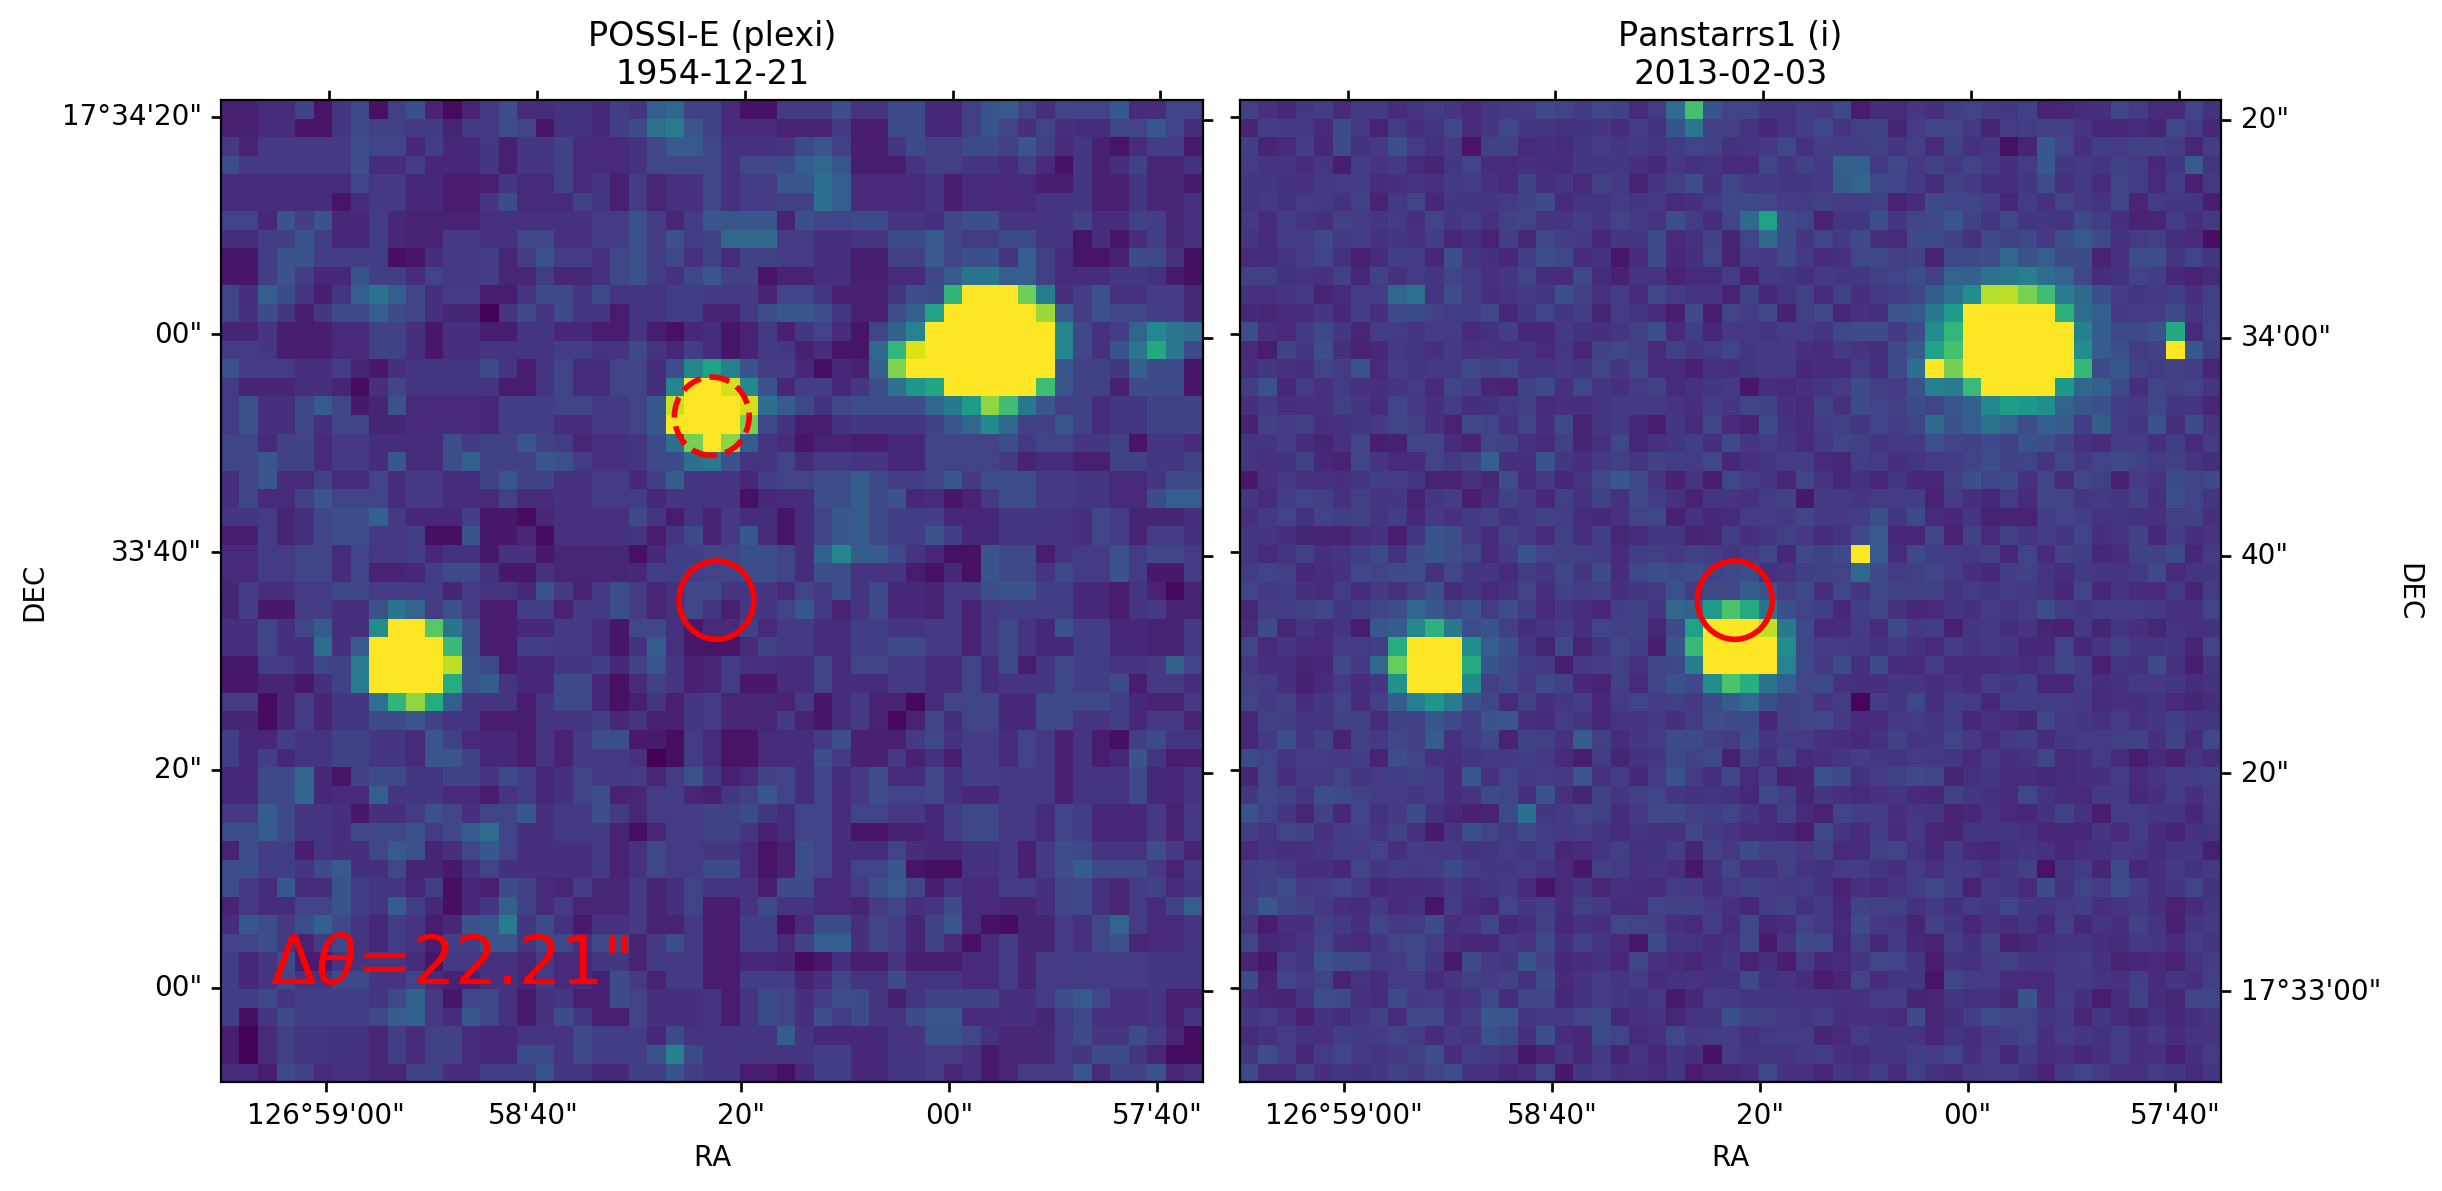

In [7]:
import numpy as np
from astropy.time import Time
from astropy.coordinates import SkyCoord, Distance
from astropy import units as u
from chronos import get_dss_data
from matplotlib.patches import Circle, Arrow

survey1 = 'dss1' #old survey
survey2 = 'ps1' #new survey, try also 'poss2ukstu_red'
color = 'r'
fig, baseline = cr.plot_archival_images(ra=s.target_coord.ra.deg,
                                        dec=s.target_coord.dec.deg,
                                        survey1=survey1,
                                        survey2=survey2,
                                        filter='i',
                                        width=1.5,
                                        height=1.5,
                                        color=color,
                                        cmap='viridis',
                                        contrast=0.1,
                                        return_baseline=True
                                       )

gp = s.query_gaia_dr2_catalog(return_nearest_xmatch=True)
pmra, pmdec = gp['pmra'], gp['pmdec']
pm = np.hypot(pmra, pmdec) #mas/yr
offset = pm*baseline/1e3
text = r"$\Delta \theta$="+f"{offset:.2f}\""
ax = fig.axes[0]
ax.text(0.05, 0.1, text, transform=ax.transAxes, c=color, fontsize=24);

#current position
rv = 1 if np.isnan(gp.radial_velocity) else gp.radial_velocity
coord = SkyCoord(ra=gp.ra*u.deg, dec=gp.dec*u.deg, 
         pm_ra_cosdec=gp.pmra*u.mas/u.yr, 
         pm_dec=gp.pmdec*u.mas/u.yr,
         distance=Distance(parallax=gp.parallax*u.mas),
         radial_velocity=rv*u.km/u.second,
         equinox='J2015.5', 
         obstime='2015-05-01T0:0:0'
        )
hdu = get_dss_data(ra=s.target_coord.ra.deg,
                   dec=s.target_coord.dec.deg,
                   survey=survey1, 
                   epoch="J2000", 
                   height=1, width=1, 
                   plot=False
                  )
#position in POSS1 image
c0 = coord.apply_space_motion(Time(hdu.header['DATE-OBS']))
c = Circle((c0.ra.deg, c0.dec.deg), 0.001, edgecolor=color, facecolor='none',
                  lw=2, transform=ax.get_transform('fk5'), ls='--')
ax.add_patch(c);
# dx = gp.ra-c0.ra.deg
# dy = gp.dec-c0.dec.deg
# a = Arrow(x=c0.ra.deg, y=c0.dec.deg, dx=dx, dy=dy, edgecolor=color, facecolor='none',
#                   lw=2, transform=ax.get_transform('fk5'))
# ax.add_patch(a);